In [476]:
# Workspace to work on getting the data forn all locations 
import pandas as pd
import datetime
from datetime import datetime, time
import numpy as np

# Load the CSV file into a DataFrame
berlin_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/berlin_0320.csv')
# berlin_df = pd.read_csv('../Data_API/dep_flights/depFlight_0320/berlin_0320.csv')
berlin_df['week'] = pd.to_datetime(berlin_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
berlin_df['airline'] = np.where(berlin_df['depFlight_name'] == berlin_df['retFlight_name'], berlin_df['depFlight_name'],'Mixed' )

# 2023-06-02T14:20:00

# Printing the first 5 rows of the DataFrame
display(berlin_df.head())




,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week,airline
0,13771-2306021420--32356-0-9828-2306021710|9828...,13771-2306021420--32356-0-9828-2306021710,London Luton,LTN,Berlin Brandenburg,BER,110,2023-06-02T14:20:00,2023-06-02T17:10:00,easyJet,...,available,3.56,3.884484,4.220968,4.864768,4.079936,2.206272,317.99,22,Mixed
1,13542-2306020640--32356-0-9828-2306020940|9828...,13542-2306020640--32356-0-9828-2306020940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T06:40:00,2023-06-02T09:40:00,easyJet,...,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,447.59,22,Mixed
2,13554-2306020650--32480-0-9828-2306020940|9828...,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,282.60,22,British Airways
3,13554-2306021030--32480-0-9828-2306021325|9828...,13554-2306021030--32480-0-9828-2306021325,London Heathrow,LHR,Berlin Brandenburg,BER,115,2023-06-02T10:30:00,2023-06-02T13:25:00,British Airways,...,available,4.25,4.622984,4.600808,4.994156,4.469772,3.321472,394.28,22,British Airways
4,13554-2306020650--32480-0-9828-2306020940|9828...,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,291.88,22,Mixed


In [477]:
# Here we get the amount of flights just for reference

selected_cols = berlin_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]

bl_flight_name_week = selected_cols.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(bl_flight_name_week)


airline,week,British Airways,Mixed,Ryanair,easyJet
0,22,55,136,9,16
1,23,59,119,9,16
2,24,40,96,9,16
3,25,40,112,9,16
4,26,40,111,9,16
5,27,54,123,9,16
6,28,54,119,9,16
7,29,45,119,9,16
8,30,45,119,9,16
9,31,45,116,9,16


,airline,week,price_amount
0,British Airways,22,338
1,British Airways,23,316
2,British Airways,24,322
3,British Airways,25,259
4,British Airways,26,306
...,...,...,...
67,easyJet,35,166
68,easyJet,36,154
69,easyJet,37,145
70,easyJet,38,273


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1519827742.py:9: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

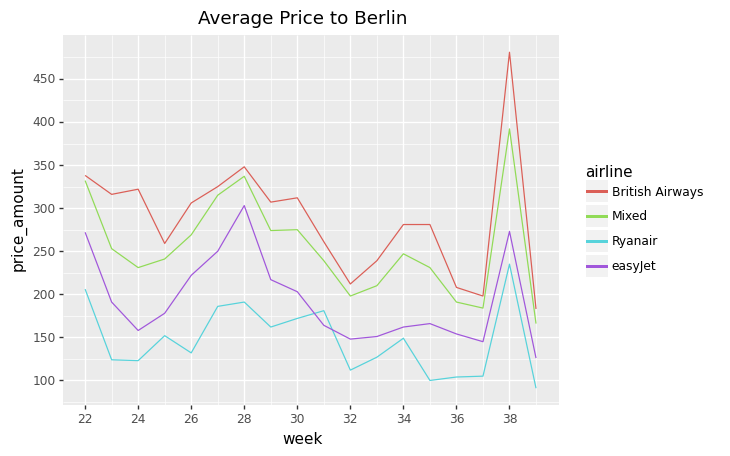

<ggplot: (8766311440083)>

In [478]:
selected_cols_price = berlin_df[['id', 'airline', 'week', 'price_amount']]

bl_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_mean)

from plotnine import ggplot, aes, geom_line, scale_x_continuous, scale_y_continuous,labs

# Reshape the data from wide to long format
df_long = bl_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using plotnine
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_mean['week'].min(), bl_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Berlin")
)



,airline,week,price_amount
0,British Airways,22,345
1,British Airways,23,286
2,British Airways,24,302
3,British Airways,25,259
4,British Airways,26,289
...,...,...,...
67,easyJet,35,163
68,easyJet,36,154
69,easyJet,37,142
70,easyJet,38,251


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1442087116.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

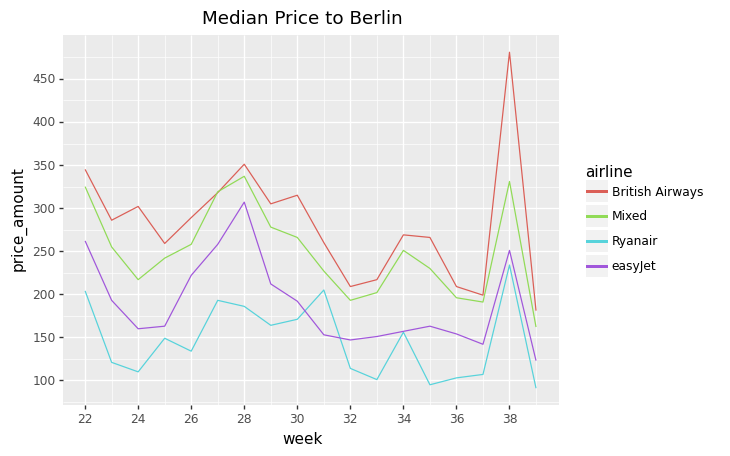

<ggplot: (8766311424232)>

In [479]:
# MEDIAN BERLIN
bl_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_median)


df_long = bl_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_median['week'].min(), bl_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Berlin")
)


,airline,week,price_amount
0,British Airways,22,268
1,British Airways,23,171
2,British Airways,24,200
3,British Airways,25,206
4,British Airways,26,167
...,...,...,...
67,easyJet,35,137
68,easyJet,36,98
69,easyJet,37,116
70,easyJet,38,230


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/4286149037.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

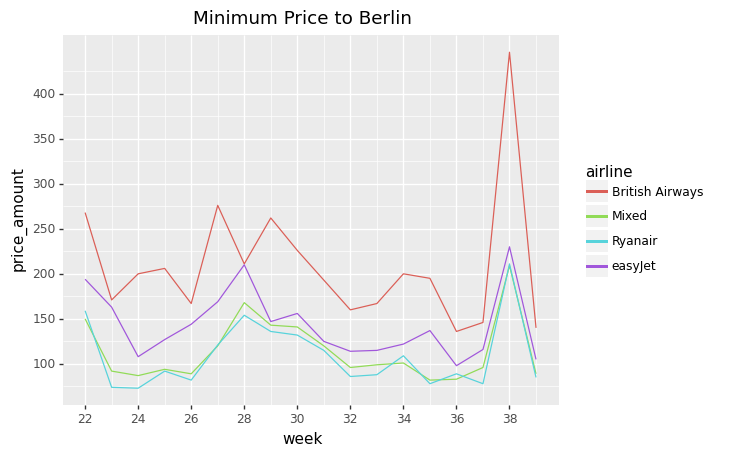

<ggplot: (8766309295367)>

In [480]:
# MINIMUM BERLIN
bl_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_min)

df_long = bl_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_min['week'].min(), bl_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Berlin")
)

In [481]:
# Madrid Average Price

# madrid_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/madrid_0320.csv')
madrid_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/madrid_0320.csv')
madrid_df['week'] = pd.to_datetime(madrid_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
madrid_df['airline'] = np.where(madrid_df['depFlight_name'] == madrid_df['retFlight_name'], madrid_df['depFlight_name'],'Mixed' )
# display(madrid_df.head())


In [482]:
# Madrid

selected_cols_madrid = madrid_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols_madrid.shape)

madrid_flight_name_week = selected_cols_madrid.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(madrid_flight_name_week)

(20485, 4)


airline,week,Air Europa,British Airways,Iberia,Iberia Express,Mixed,Ryanair,Vueling Airlines,easyJet
0,22,4,183,237,4,624,9,100,4
1,23,4,169,238,4,697,9,100,4
2,24,4,169,224,4,773,9,100,4
3,25,4,135,182,4,680,9,92,4
4,26,4,147,188,4,671,9,110,6
5,27,4,130,169,4,680,9,108,9
6,28,4,127,169,4,718,9,103,9
7,29,4,117,156,4,688,9,109,9
8,30,4,119,156,4,776,9,110,9
9,31,4,80,99,4,582,9,56,9


,airline,week,price_amount
0,Air Europa,22,278
1,Air Europa,23,193
2,Air Europa,24,175
3,Air Europa,25,232
4,Air Europa,26,342
...,...,...,...
139,easyJet,35,150
140,easyJet,36,124
141,easyJet,37,119
142,easyJet,38,123


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/91072255.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetite

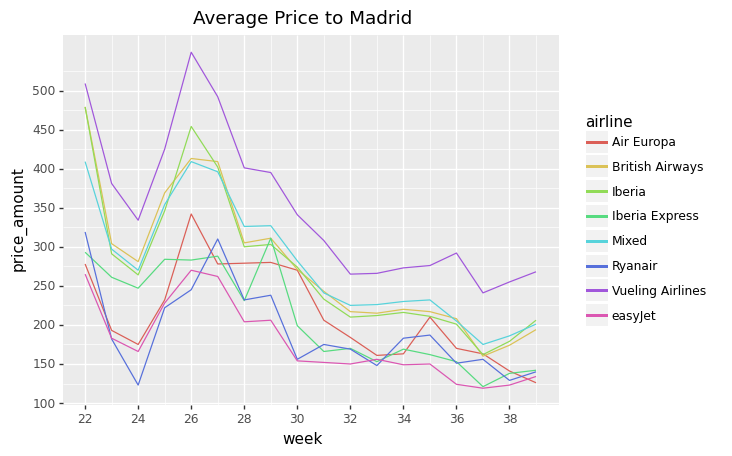

<ggplot: (8766313778312)>

In [483]:
# AVERAGE PRICE TO MADRID
selected_cols_price = madrid_df[['id', 'airline', 'week', 'price_amount']]

madrid_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_mean)

df_long = madrid_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_mean['week'].min(), madrid_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Madrid")
)

,airline,week,price_amount
0,Air Europa,22,278
1,Air Europa,23,194
2,Air Europa,24,174
3,Air Europa,25,232
4,Air Europa,26,342
...,...,...,...
139,easyJet,35,144
140,easyJet,36,129
141,easyJet,37,130
142,easyJet,38,127


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/532432941.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

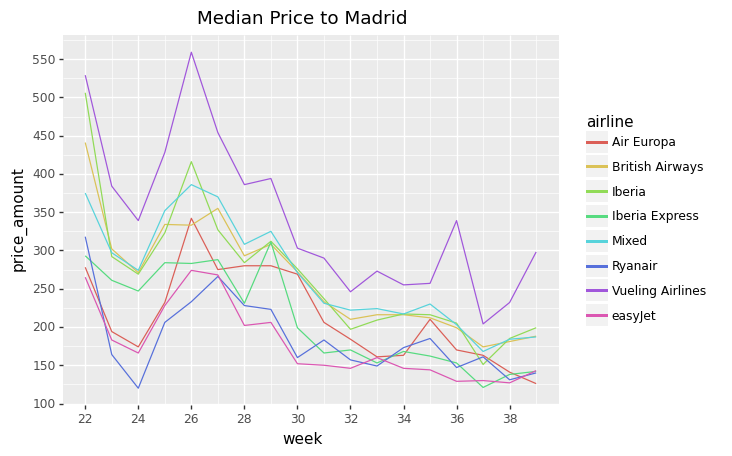

<ggplot: (8766310163553)>

In [484]:
# MEDIAN PRICE TO MADRID

madrid_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_median)

df_long = madrid_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_median['week'].min(), madrid_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Madrid")
)


,airline,week,price_amount
0,Air Europa,22,231
1,Air Europa,23,170
2,Air Europa,24,160
3,Air Europa,25,206
4,Air Europa,26,310
...,...,...,...
139,easyJet,35,117
140,easyJet,36,79
141,easyJet,37,79
142,easyJet,38,84


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/3713082727.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

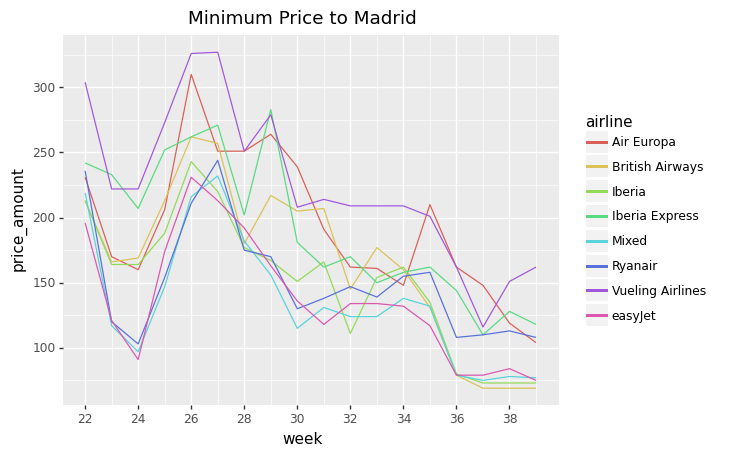

<ggplot: (8766311363082)>

In [485]:
# MINIMUM PRICE FOR MADRID
madrid_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_min)

df_long = madrid_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_min['week'].min(), madrid_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Madrid")
)


In [486]:
# ATHENS

# athens_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/athens_0320.csv')
athens_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/athens_0320.csv')
athens_df['week'] = pd.to_datetime(athens_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
athens_df['airline'] = np.where(athens_df['depFlight_name'] == athens_df['retFlight_name'], athens_df['depFlight_name'],'Mixed' )
# display(athens_df.head())

In [487]:
# ATHENS 
selected_cols_athens = athens_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols_athens.shape)

athens_flight_name_week = selected_cols_athens.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(athens_flight_name_week)

(4257, 4)


airline,week,Aegean Airlines,British Airways,Mixed,Ryanair,SKY express,Wizz Air UK,easyJet
0,22,9,24,173,4,1,6,6
1,23,9,27,173,4,1,6,6
2,24,9,25,182,4,1,6,6
3,25,9,28,170,4,1,6,6
4,26,9,30,196,4,1,6,9
5,27,9,24,194,4,2,6,9
6,28,9,25,200,4,1,6,9
7,29,9,25,204,4,1,6,9
8,30,9,26,190,4,1,6,9
9,31,9,24,179,4,1,6,9


,airline,week,price_amount
0,Aegean Airlines,22,637
1,Aegean Airlines,23,454
2,Aegean Airlines,24,399
3,Aegean Airlines,25,439
4,Aegean Airlines,26,637
...,...,...,...
121,easyJet,35,434
122,easyJet,36,343
123,easyJet,37,303
124,easyJet,38,314


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/2721409385.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

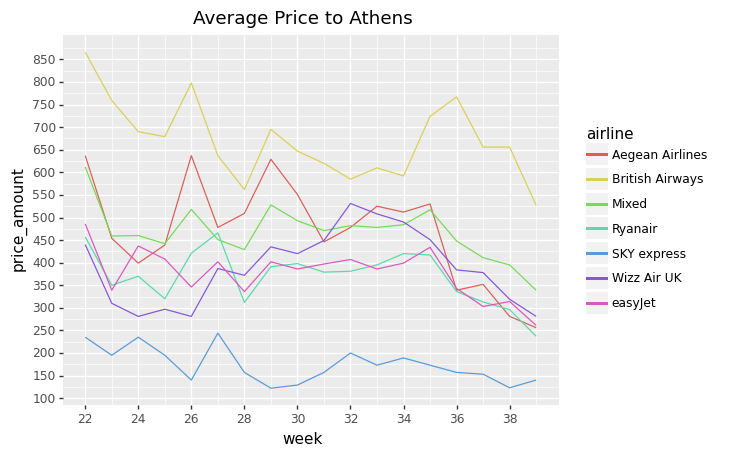

<ggplot: (8766309647583)>

In [488]:
# AVERAGE PRICE TO ATHENS
selected_cols_price = athens_df[['id', 'airline', 'week', 'price_amount']]

athens_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_mean)

df_long = athens_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_mean['week'].min(), athens_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Athens")
)

,airline,week,price_amount
0,Aegean Airlines,22,625
1,Aegean Airlines,23,440
2,Aegean Airlines,24,388
3,Aegean Airlines,25,446
4,Aegean Airlines,26,649
...,...,...,...
121,easyJet,35,438
122,easyJet,36,343
123,easyJet,37,307
124,easyJet,38,314


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/581380744.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

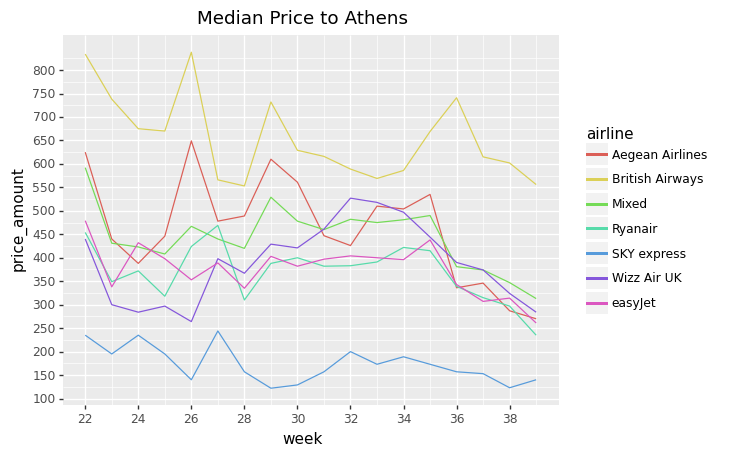

<ggplot: (8766313863322)>

In [489]:
# MEDIAN PRICE TO ATHENS

athens_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_median)

# Reshape the data from wide to long format
df_long = athens_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_median['week'].min(), athens_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Athens")
)

,airline,week,price_amount
0,Aegean Airlines,22,597
1,Aegean Airlines,23,383
2,Aegean Airlines,24,299
3,Aegean Airlines,25,347
4,Aegean Airlines,26,465
...,...,...,...
121,easyJet,35,419
122,easyJet,36,330
123,easyJet,37,272
124,easyJet,38,287


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/2224510912.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

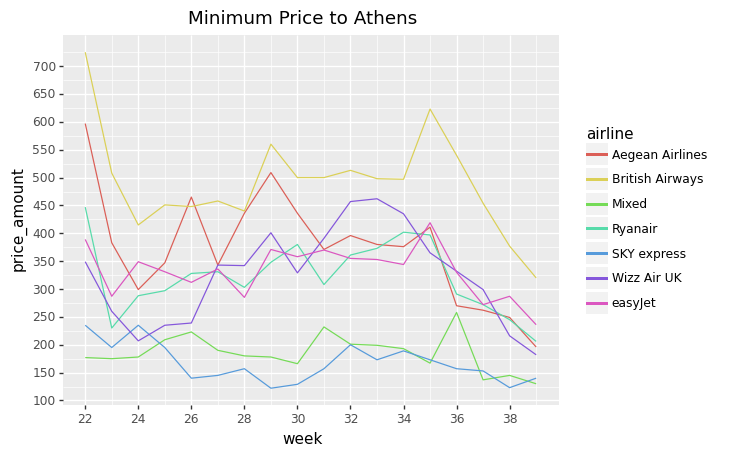

<ggplot: (8766310193872)>

In [490]:
# MINIMUM PRICE TO ATHENS
athens_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_min)

df_long = athens_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_min['week'].min(), athens_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Athens")
)

In [491]:
# BUDAPEST

# budapest_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/budapest_0320.csv')
budapest_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/budapest_0320.csv')
budapest_df['week'] = pd.to_datetime(budapest_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
budapest_df['airline'] = np.where(budapest_df['depFlight_name'] == budapest_df['retFlight_name'], budapest_df['depFlight_name'],'Mixed' )
# display(budapest_df.head())



In [492]:
# Here we get the amount of flights just for reference
selected_cols_budapest = budapest_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]

budapest_flight_name_week = selected_cols_budapest.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(budapest_flight_name_week)

airline,week,British Airways,Mixed,Ryanair,Wizz Air,easyJet
0,22,16,95,16,16,1
1,23,9,94,16,16,1
2,24,12,101,16,16,1
3,25,12,108,16,16,1
4,26,16,134,16,16,4
5,27,16,132,16,16,4
6,28,16,134,16,16,4
7,29,16,119,16,16,4
8,30,12,133,16,16,4
9,31,12,126,16,16,4


,airline,week,price_amount
0,British Airways,22,449
1,British Airways,23,478
2,British Airways,24,554
3,British Airways,25,425
4,British Airways,26,456
...,...,...,...
85,easyJet,35,284
86,easyJet,36,273
87,easyJet,37,302
88,easyJet,38,218


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/731481521.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

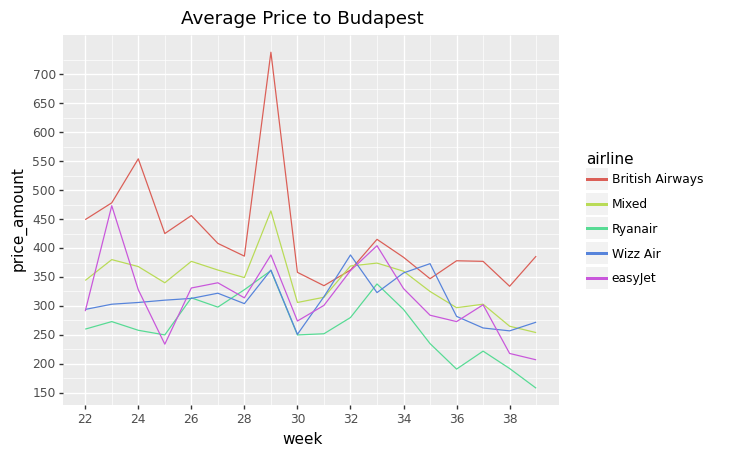

<ggplot: (8766312539516)>

In [493]:
# AVERAGE PRICE TO BUDAPEST
selected_cols_price = budapest_df[['id', 'airline', 'week', 'price_amount']]

budapest_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(budapest_flight_name_week_two_mean)

df_long = budapest_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(budapest_flight_name_week_two_mean['week'].min(), budapest_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, budapest_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Budapest")
)



,airline,week,price_amount
0,British Airways,22,490
1,British Airways,23,523
2,British Airways,24,533
3,British Airways,25,430
4,British Airways,26,473
...,...,...,...
85,easyJet,35,284
86,easyJet,36,273
87,easyJet,37,302
88,easyJet,38,218


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/964642332.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

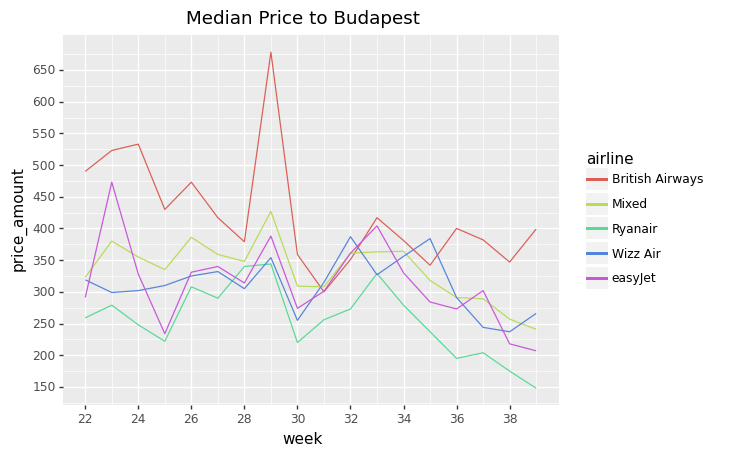

<ggplot: (8766312360617)>

In [494]:
# MEDIAN PRICE TO BUDAPEST

budapest_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(budapest_flight_name_week_two_median)

df_long = budapest_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(budapest_flight_name_week_two_median['week'].min(), budapest_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, budapest_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Budapest")
)


,airline,week,price_amount
0,British Airways,22,289
1,British Airways,23,314
2,British Airways,24,345
3,British Airways,25,300
4,British Airways,26,328
...,...,...,...
85,easyJet,35,221
86,easyJet,36,188
87,easyJet,37,254
88,easyJet,38,166


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/4256844731.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

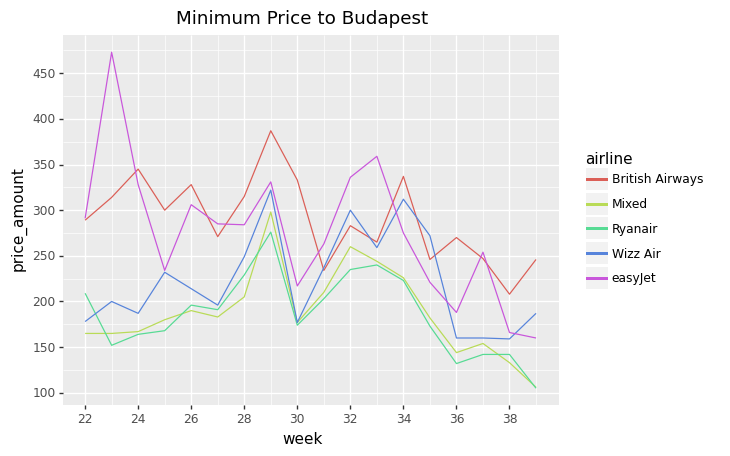

<ggplot: (8766315237560)>

In [495]:
# Minimum Price to Budapest
budapest_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(budapest_flight_name_week_two_min)

df_long = budapest_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(budapest_flight_name_week_two_min['week'].min(), budapest_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, budapest_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Budapest")
)


In [496]:
# LISBON
lisbon_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/lisbon_0320.csv')
lisbon_df['week'] = pd.to_datetime(lisbon_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
lisbon_df['airline'] = np.where(lisbon_df['depFlight_name'] == lisbon_df['retFlight_name'], lisbon_df['depFlight_name'],'Mixed' )
display(lisbon_df.head())


,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week,airline
0,16574-2306020725--31915-0-13577-2306021015|135...,16574-2306020725--31915-0-13577-2306021015,London Stansted,STN,Lisbon,LIS,170,2023-06-02T07:25:00,2023-06-02T10:15:00,Ryanair,...,available,3.56,3.884484,4.220968,4.864768,4.079936,2.206272,367.99,22,Ryanair
1,13771-2306021225--32356-0-13577-2306021515|135...,13771-2306021225--32356-0-13577-2306021515,London Luton,LTN,Lisbon,LIS,170,2023-06-02T12:25:00,2023-06-02T15:15:00,easyJet,...,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,594.09,22,Mixed
2,13554-2306021245--32480-0-13577-2306021535|135...,13554-2306021245--32480-0-13577-2306021535,London Heathrow,LHR,Lisbon,LIS,170,2023-06-02T12:45:00,2023-06-02T15:35:00,British Airways,...,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,641.36,22,Mixed
3,13554-2306021845--31781-0-13577-2306022125|135...,13554-2306021845--31781-0-13577-2306022125,London Heathrow,LHR,Lisbon,LIS,160,2023-06-02T18:45:00,2023-06-02T21:25:00,TAP Air Portugal,...,available,3.48,3.670664,4.299488,4.969300,3.597548,2.365480,420.98,22,Mixed
4,13542-2306022000--32356-0-13577-2306022250|135...,13542-2306022000--32356-0-13577-2306022250,London Gatwick,LGW,Lisbon,LIS,170,2023-06-02T20:00:00,2023-06-02T22:50:00,easyJet,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,323.89,22,Mixed


In [497]:
selected_cols_lisbon = lisbon_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]

lisbon_flight_name_week = selected_cols_lisbon.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(lisbon_flight_name_week)

airline,week,British Airways,Mixed,Ryanair,TAP Air Portugal,Wizz Air UK,easyJet
0,22,8,312,16,56,1,36
1,23,12,333,16,56,1,36
2,24,9,309,16,56,1,36
3,25,9,318,16,56,1,36
4,26,12,310,16,56,1,36
5,27,16,339,16,56,1,36
6,28,16,354,16,56,1,36
7,29,16,326,16,48,1,36
8,30,16,341,16,56,1,36
9,31,16,363,16,56,1,36


,airline,week,price_amount
0,British Airways,22,374
1,British Airways,23,505
2,British Airways,24,445
3,British Airways,25,422
4,British Airways,26,488
...,...,...,...
103,easyJet,35,307
104,easyJet,36,218
105,easyJet,37,218
106,easyJet,38,185


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/629857741.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

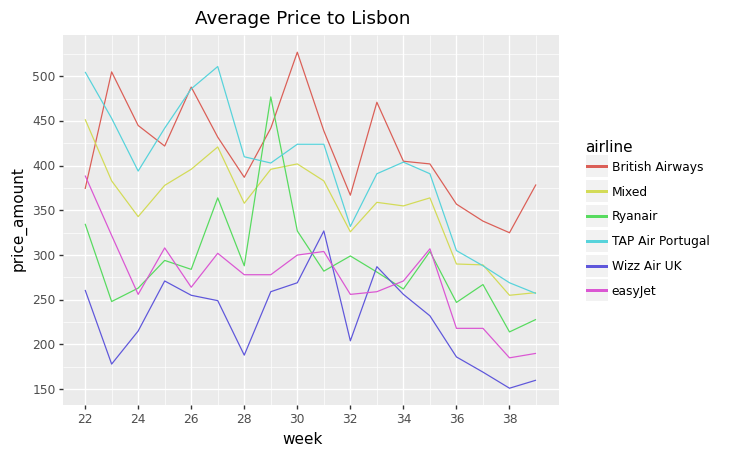

<ggplot: (8766313888497)>

In [498]:
# AVERAGE PRICE TO LISBON
selected_cols_price = lisbon_df[['id', 'airline', 'week', 'price_amount']]

lisbon_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(lisbon_flight_name_week_two_mean)

df_long = lisbon_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(lisbon_flight_name_week_two_mean['week'].min(), lisbon_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, lisbon_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Lisbon")
)

,airline,week,price_amount
0,British Airways,22,360
1,British Airways,23,492
2,British Airways,24,451
3,British Airways,25,424
4,British Airways,26,494
...,...,...,...
103,easyJet,35,304
104,easyJet,36,221
105,easyJet,37,206
106,easyJet,38,191


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1601818057.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

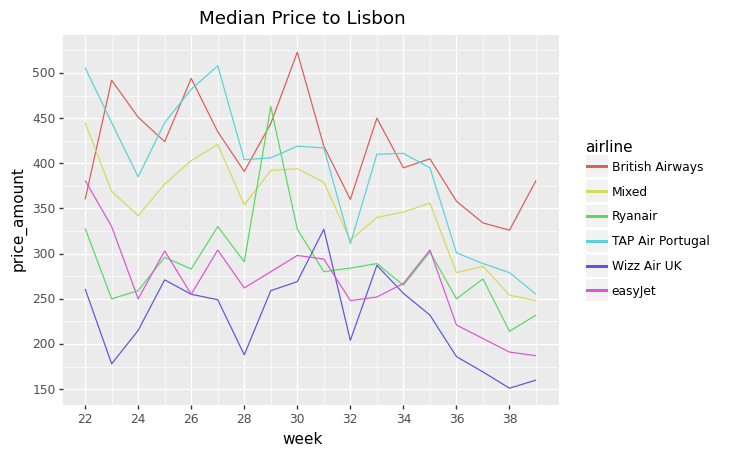

<ggplot: (8766312311799)>

In [499]:
# MEDIAN PRICE TO LISBON

lisbon_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(lisbon_flight_name_week_two_median)

df_long = lisbon_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(lisbon_flight_name_week_two_median['week'].min(), lisbon_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, lisbon_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Lisbon")
)

,airline,week,price_amount
0,British Airways,22,213
1,British Airways,23,332
2,British Airways,24,369
3,British Airways,25,345
4,British Airways,26,406
...,...,...,...
103,easyJet,35,257
104,easyJet,36,130
105,easyJet,37,138
106,easyJet,38,121


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1816259190.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

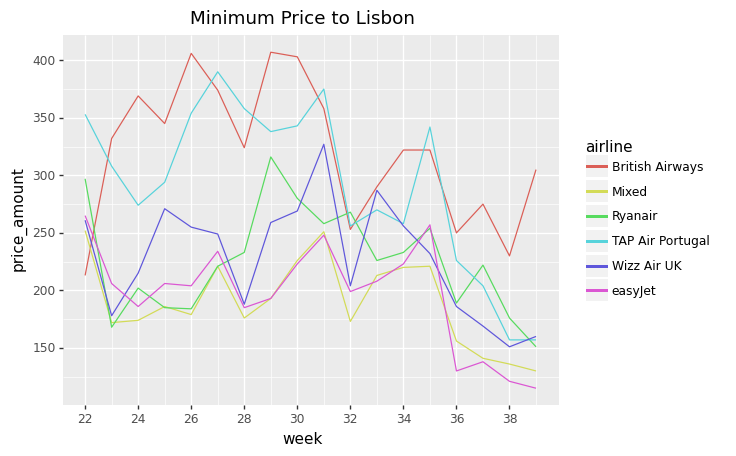

<ggplot: (8766314677053)>

In [500]:
# MINIMUM PRICE TO LISBON

lisbon_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(lisbon_flight_name_week_two_min)

df_long = lisbon_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(lisbon_flight_name_week_two_min['week'].min(), lisbon_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, lisbon_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Lisbon")
)

In [501]:
# PARIS
paris_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/paris_0320.csv')
paris_df['week'] = pd.to_datetime(paris_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
paris_df['airline'] = np.where(paris_df['depFlight_name'] == paris_df['retFlight_name'], paris_df['depFlight_name'],'Mixed' )
# display(paris_df.head())

In [502]:
selected_cols_paris = paris_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]

paris_flight_name_week = selected_cols_paris.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(paris_flight_name_week)

airline,week,Air France,British Airways,Mixed,Vueling Airlines,easyJet
0,22,36,40,351,6,72
1,23,36,40,376,6,72
2,24,36,40,358,6,72
3,25,36,40,355,6,72
4,26,36,39,375,6,81
5,27,18,40,331,6,90
6,28,25,44,366,6,90
7,29,25,40,368,6,90
8,30,20,45,352,6,90
9,31,20,45,361,6,90


,airline,week,price_amount
0,Air France,22,446
1,Air France,23,322
2,Air France,24,388
3,Air France,25,399
4,Air France,26,403
...,...,...,...
85,easyJet,35,95
86,easyJet,36,150
87,easyJet,37,106
88,easyJet,38,331


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/3800842967.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

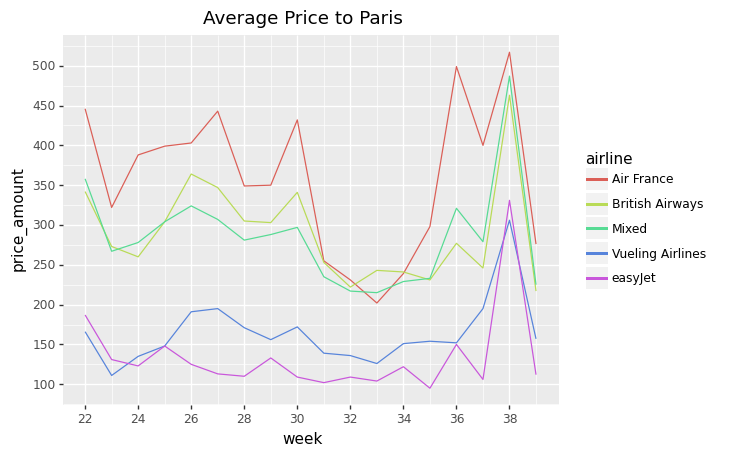

<ggplot: (8766315135299)>

In [503]:
# AVERAGE PRICE TO PARIS
selected_cols_price = paris_df[['id', 'airline', 'week', 'price_amount']]

paris_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(paris_flight_name_week_two_mean)

df_long = paris_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(paris_flight_name_week_two_mean['week'].min(), paris_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, paris_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Paris")
)

,airline,week,price_amount
0,Air France,22,436
1,Air France,23,307
2,Air France,24,369
3,Air France,25,362
4,Air France,26,372
...,...,...,...
85,easyJet,35,90
86,easyJet,36,141
87,easyJet,37,104
88,easyJet,38,298


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/207715212.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

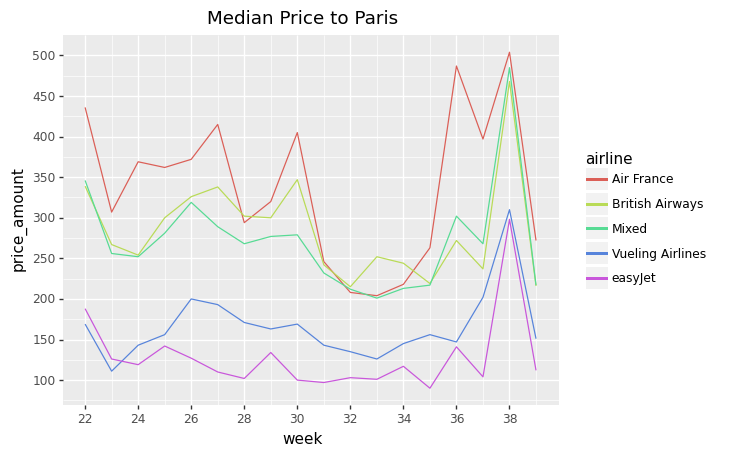

<ggplot: (8766314991891)>

In [504]:
# MEDIAN PRICE TO PARIS
paris_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(paris_flight_name_week_two_median)

df_long = paris_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(paris_flight_name_week_two_median['week'].min(), paris_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, paris_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Paris")
)

,airline,week,price_amount
0,Air France,22,272
1,Air France,23,253
2,Air France,24,238
3,Air France,25,250
4,Air France,26,281
...,...,...,...
85,easyJet,35,75
86,easyJet,36,74
87,easyJet,37,73
88,easyJet,38,211


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1221995781.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

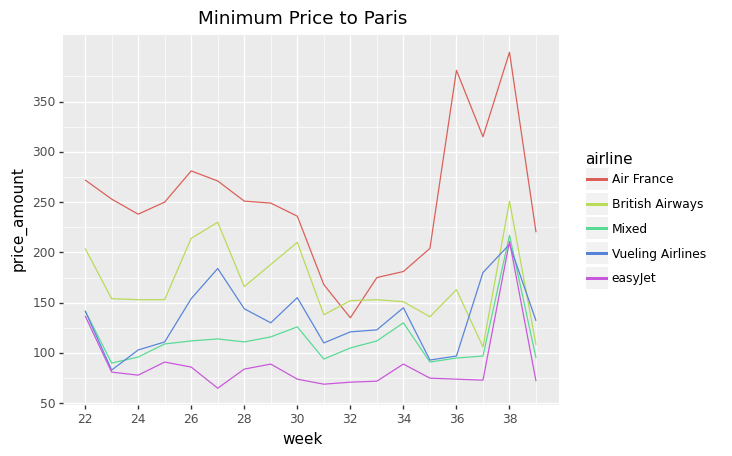

<ggplot: (8766313350497)>

In [505]:
# MINIMUM PRICE TO PARIS
paris_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(paris_flight_name_week_two_min)

df_long = paris_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(paris_flight_name_week_two_min['week'].min(), paris_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, paris_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Paris")
)

In [506]:
# ROME
rome_df = pd.read_csv('../dep&ret_flights/dep&ret_flights_0320/rome_0320.csv')
rome_df['week'] = pd.to_datetime(rome_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
rome_df['airline'] = np.where(rome_df['depFlight_name'] == rome_df['retFlight_name'], rome_df['depFlight_name'],'Mixed' )
# display(rpome_df.head())

In [507]:
selected_cols_rome = rome_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]

rome_flight_name_week = selected_cols_rome.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(rome_flight_name_week)

airline,week,British Airways,ITA Airways,Iberia,Jet2,Mixed,Ryanair,Vueling Airlines,Wizz Air,easyJet
0,22,90,4,9,1,442,16,9,2,9
1,23,80,4,9,1,436,16,9,2,9
2,24,100,4,9,1,408,16,9,2,9
3,25,90,4,9,1,419,16,9,2,9
4,26,90,4,9,1,448,16,9,2,9
5,27,81,4,9,1,414,16,9,2,12
6,28,72,4,6,1,404,16,6,2,12
7,29,90,3,9,1,468,16,9,2,12
8,30,90,4,9,1,443,16,9,4,12
9,31,90,4,9,1,463,16,9,4,12


,airline,week,price_amount
0,British Airways,22,568
1,British Airways,23,503
2,British Airways,24,555
3,British Airways,25,555
4,British Airways,26,532
...,...,...,...
157,easyJet,35,302
158,easyJet,36,214
159,easyJet,37,215
160,easyJet,38,214


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/3275498032.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

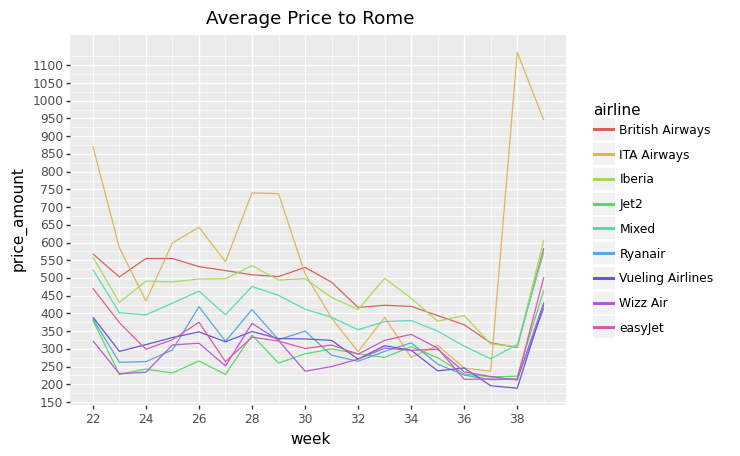

<ggplot: (8766313212254)>

In [508]:
# AVERAGE PRICE TO ROME
selected_cols_price = rome_df[['id', 'airline', 'week', 'price_amount']]

rome_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(rome_flight_name_week_two_mean)

df_long = rome_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(rome_flight_name_week_two_mean['week'].min(), rome_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, rome_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Rome")
)

,airline,week,price_amount
0,British Airways,22,575
1,British Airways,23,495
2,British Airways,24,555
3,British Airways,25,572
4,British Airways,26,530
...,...,...,...
157,easyJet,35,302
158,easyJet,36,214
159,easyJet,37,211
160,easyJet,38,216


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/2345141083.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

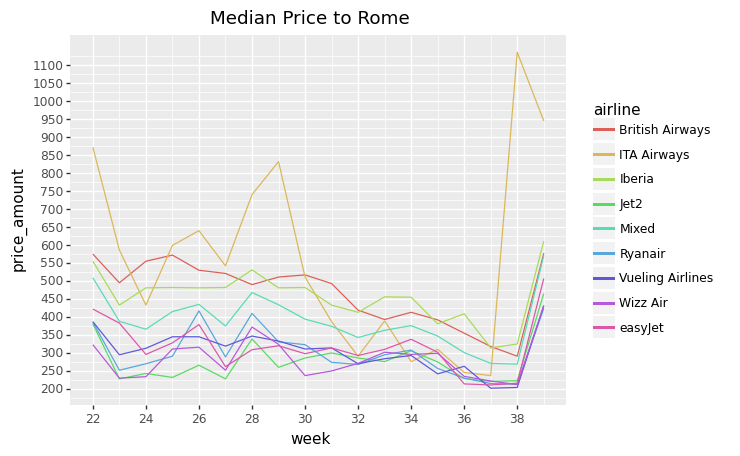

<ggplot: (8766317220205)>

In [509]:
# MEDIAN PRICE TO ROME
selected_cols_price = rome_df[['id', 'airline', 'week', 'price_amount']]

rome_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(rome_flight_name_week_two_median)

df_long = rome_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(rome_flight_name_week_two_median['week'].min(), rome_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, rome_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Rome")
)

,airline,week,price_amount
0,British Airways,22,341
1,British Airways,23,300
2,British Airways,24,257
3,British Airways,25,326
4,British Airways,26,337
...,...,...,...
157,easyJet,35,256
158,easyJet,36,173
159,easyJet,37,171
160,easyJet,38,159


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_1373/1482286816.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

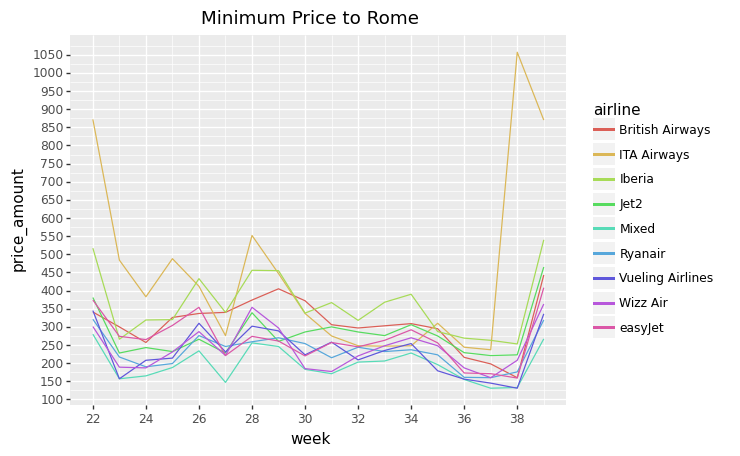

<ggplot: (8766311849385)>

In [510]:
# MINIMUM PRICE TO ROME
selected_cols_price = rome_df[['id', 'airline', 'week', 'price_amount']]

rome_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(rome_flight_name_week_two_min)

df_long = rome_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(rome_flight_name_week_two_min['week'].min(), rome_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, rome_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Rome")
)